In [ ]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 4.5MB/s 


In [ ]:
# import framework 
import numpy as np
import pandas as pd
import glob 
import re
 
 # Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, BaggingRegressor, GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics.pairwise import linear_kernel

# Performance metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
%matplotlib inline

## timer
import time 

## save model and other librery 
from sklearn.pipeline import Pipeline
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import MLkNN
import pickle
from skmultilearn.problem_transform import BinaryRelevance

### language 

import matplotlib.font_manager as fm
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Tahoma']})


In [ ]:
## Add thai front 
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

--2021-06-20 06:59:56--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-06-20 06:59:56--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.01s   

2021-06-20 06:59:56 (6.59 MB/s) - ‘t

In [ ]:
print(time.time()) 

1624129921.2864711


In [ ]:
## G-google mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# check path  
%cd 

/root


In [ ]:
df_train  = pd.read_csv('/content/drive/MyDrive/deep_final/Training_newsdata.csv')
df_test = pd.read_csv('/content/drive/MyDrive/deep_final/testing_newsdata.csv')
#/content/drive/MyDrive/deep_final/adj_type_data_tkn.csv   #nig 
#/content/drive/MyDrive/google colab/Colab Notebooks/adj_type_data_tkn.csv # kong 

In [ ]:
print('Train_data : ',df_train.shape)
print('Test_data : ',df_test.shape)

Train_data :  (132175, 20)
Test_data :  (56647, 20)


In [ ]:
df_train.head()

,Unnamed: 0,type,ไลฟ์สไตล์,เศรษฐกิจ,ต่างประเทศ,ความมั่นคง,สิ่งแวดล้อม,ผู้หญิง,การเมือง,แรงงาน,สังคม,อาชญากรรม,บันเทิง,สิทธิมนุษยชน,การศึกษา,วิทยาศาสตร์เทคโนโลยี,คุณภาพชีวิต,วัฒนธรรม,กีฬา,Tkn_Text
0,169629,"แรงงาน,คุณภาพชีวิต",0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,วัน ลูกจ้าง ทำงานบ้าน สากล เครือข่าย ลูกจ้าง ท...
1,128696,"ข่าว,เศรษฐกิจ",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,นาย จัก รก ฤศฏิ์ พารา พันธ กุล รองประธานกรรมกา...
2,186251,"ข่าว,อาชญากรรม",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,รอง โฆษก ตร แจง ผบ ก น สั่ง ผก ก สน ท่า พระ ตร...
3,97109,"ข่าว,ต่างประเทศ",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,สำนัก ข่าวต่างประเทศ รายงาน ว่า สม ชิ ก วุฒิสภ...
4,188332,สังคม,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,วันนี้ ก ค ที่ สถานีรถไฟ หาดใหญ่ จ สงขลา มี ปร...


In [ ]:
df_train.columns

Index(['Unnamed: 0', 'type', 'ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ',
       'ความมั่นคง', 'สิ่งแวดล้อม', 'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม',
       'อาชญากรรม', 'บันเทิง', 'สิทธิมนุษยชน', 'การศึกษา',
       'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต', 'วัฒนธรรม', 'กีฬา', 'Tkn_Text'],
      dtype='object')

In [ ]:
#check sample data 
#print('Body : ', df_train.loc[0,'body_cln'])
print('Token :',  df_train.loc[0,'Tkn_Text'])

Token : วัน ลูกจ้าง ทำงานบ้าน สากล เครือข่าย ลูกจ้าง ทำงานบ้าน ขอ รบ ไทย รับรอง อนุสัญญา ILO ว่าด้วย งาน ที่ มีคุณค่า สำหรับ ลูกจ้าง ทำงานบ้าน อย่าง เร่งด่วน เร่ง ดำเนิน การปรับปรุง กฎหมาย เรื่อง ชั่วโมง การทำงาน ค่าจ้างขั้นต่ำ การ คุ้มครอง ความ ป็น มารดา และ การ คุ้มครอง จาก การ ล่วงละเมิด การ คุกคาม และ ความรุนแรง ใน ทุก รูปแบบ ประ สังคม เร่ง ให้ เข้าถึง สิทธิ ประกันสังคม ม และ ยกเลิก คำ ว่า คนรับใช้ ใน เอกสาร ทุกชนิด ของ ทางราชการ มิ ย รายงาน ข่าว แจ้ง ว่า เมื่อ วันที่ มิ ย ที่ผ่านมา เครือข่าย ลูกจ้าง ทำงานบ้าน ในประเทศ ไทย กรมสวัสดิการและคุ้มครองแรงงาน กระทรวง แรงงาน และ มูลนิธิ เพื่อ การพัฒนา แรงงาน และ อาชีพ ได้ จัด การอบรม โครงการ เพิ่มประสิทธิภาพ การ คุ้มครอง สิทธิ แรงงาน ต่างด้าว กิจ กรรมการ ส่งเสริม พัฒนา ความรู้ กฎหมายแรงงาน นอก ระบบ กลุ่ม ลูกจ้าง ทำงานบ้าน แรงงาน ต่างด้าว และ วัน ลูกจ้าง ทำงานบ้าน สากล ณ ห้องประชุม โรงแรม เดอะ พาลา ซ โซ่ กรุงเทพฯ การ จัดงาน ครั้งนี้ เพื่อ แลกเปลี่ยน เรียนรู้ ใน ประเด็น ที่ เกี่ยวข้อง กับ ลูกจ้าง ทำงานบ้าน ซึ่ง เป็นการ เพิ่มพูนความรู้ และ พั

In [ ]:
## sample data 
#df.loc[7297,'Tkn_Text']

In [ ]:
# copy file 
df_train_prep = df_train.copy()
df_test_prep =  df_test.copy()

In [ ]:
## Drop un-useful columns 
df_train_prep = df_train_prep.drop(columns = ['Unnamed: 0','type'])
df_test_prep = df_test_prep.drop(columns = ['Unnamed: 0','type'])

In [ ]:
df_train_prep.head()

,ไลฟ์สไตล์,เศรษฐกิจ,ต่างประเทศ,ความมั่นคง,สิ่งแวดล้อม,ผู้หญิง,การเมือง,แรงงาน,สังคม,อาชญากรรม,บันเทิง,สิทธิมนุษยชน,การศึกษา,วิทยาศาสตร์เทคโนโลยี,คุณภาพชีวิต,วัฒนธรรม,กีฬา,Tkn_Text
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,วัน ลูกจ้าง ทำงานบ้าน สากล เครือข่าย ลูกจ้าง ท...
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,นาย จัก รก ฤศฏิ์ พารา พันธ กุล รองประธานกรรมกา...
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,รอง โฆษก ตร แจง ผบ ก น สั่ง ผก ก สน ท่า พระ ตร...
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,สำนัก ข่าวต่างประเทศ รายงาน ว่า สม ชิ ก วุฒิสภ...
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,วันนี้ ก ค ที่ สถานีรถไฟ หาดใหญ่ จ สงขลา มี ปร...


In [ ]:
# check null value
print(df_train_prep.isnull().sum())
print(df_test_prep.isnull().sum())

ไลฟ์สไตล์               0
เศรษฐกิจ                0
ต่างประเทศ              0
ความมั่นคง              0
สิ่งแวดล้อม             0
ผู้หญิง                 0
การเมือง                0
แรงงาน                  0
สังคม                   0
อาชญากรรม               0
บันเทิง                 0
สิทธิมนุษยชน            0
การศึกษา                0
วิทยาศาสตร์เทคโนโลยี    0
คุณภาพชีวิต             0
วัฒนธรรม                0
กีฬา                    0
Tkn_Text                0
dtype: int64
ไลฟ์สไตล์               0
เศรษฐกิจ                0
ต่างประเทศ              0
ความมั่นคง              0
สิ่งแวดล้อม             0
ผู้หญิง                 0
การเมือง                0
แรงงาน                  0
สังคม                   0
อาชญากรรม               0
บันเทิง                 0
สิทธิมนุษยชน            0
การศึกษา                0
วิทยาศาสตร์เทคโนโลยี    0
คุณภาพชีวิต             0
วัฒนธรรม                0
กีฬา                    0
Tkn_Text                0
dtype: int64


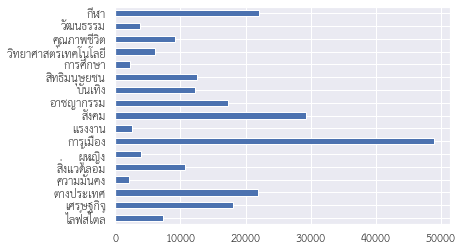

In [ ]:
import seaborn as sn
df_total = df_train_prep.append(df_test_prep)
df_total.iloc[:,:-1].sum(axis = 0).plot.barh()

In [ ]:
### Y_lable news category 
news_cat = df_total.iloc[:,:-1].columns
news_cat_ls = list(news_cat)
print('Category',news_cat_ls)

Category ['ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ', 'ความมั่นคง', 'สิ่งแวดล้อม', 'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม', 'อาชญากรรม', 'บันเทิง', 'สิทธิมนุษยชน', 'การศึกษา', 'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต', 'วัฒนธรรม', 'กีฬา']


In [ ]:
# y_train = y_train.drop(columns= 'predict_กีฬา',errors='ignore')
# y_train

In [ ]:
## Train test data split 
print('before_split :' , df_total.shape )
# train, test = train_test_split(df_prep, random_state=42, test_size=0.3, shuffle=True) #random stat -42
# print('X-Test_set :' , train['Tkn_Text'].shape)
# print('X-Test_set :' , test['Tkn_Text'].shape)

x_train = df_train_prep['Tkn_Text']
y_train = df_train_prep[news_cat_ls]
x_test = df_test_prep['Tkn_Text']
y_test = df_test_prep[news_cat_ls]
print( x_train.shape,y_train.shape,x_train.shape,y_test.shape)

before_split : (188822, 18)
(132175,) (132175, 17) (132175,) (56647, 17)


In [ ]:
## Prep to embedding vector 
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(train['Tkn_Text'])

In [ ]:
### Define fuction
### cal accuracy 
from sklearn.metrics import classification_report
def calculate_accuracy(y_train,y_test):
  
  correct = 0
  incorrect = 0

  for i in range(0, len(y_test)):
    actual = list(y_test.iloc[i][0:17].sort_index())
    predict = list(y_test.iloc[i][17:].sort_index())
    #yest_predict = y_test.loc[ : , y_test.columns.str.contains('predict') ].reset_index().drop(columns=['index'],errors='ignore').sort_index()
    #yest_actual= y_test.loc[:,~y_test.columns.str.contains('predict')].reset_index().drop(columns=['index'],errors='ignore').sort_index()
    #actual = list(y_test.loc[i, yest_predict.columns])
    #predict = list(y_test.loc[i, yest_actual.columns])
    #predict = 
    if predict == actual:
      correct += 1
    else:
      incorrect += 1
  
  correct_train = 0
  incorrect_train = 0
  for i in range(0, len(y_train)):
    actual_train = list(y_train.iloc[i][0:17].sort_index())
    predict_train = list(y_train.iloc[i][17:].sort_index())
    if predict_train == actual_train:
      correct_train += 1
    else:
      incorrect_train += 1

  accuracy_train = (correct_train/(correct_train+incorrect_train)) * 100
  print("Accuracy Score Train: ",accuracy_train) 
  accuracy = (correct/(correct+incorrect)) * 100
  print("Accuracy Score Test: ",accuracy) 
  
def save_mol(pip_line,name) :
      Pkl_Filename = f"/content/drive/MyDrive/deep_final/Pickle_{name}_Model.pkl" 
      with open(Pkl_Filename, 'wb') as file:  
        pickle.dump(pip_line, file)  
      print('Save Done')   

def save_mol_loop(pip_line,category) :
      Pkl_Filename = f"/content/drive/MyDrive/deep_final/ovsr_NB/Pickle_{category}_Model.pkl" 
      with open(Pkl_Filename, 'wb') as file:  
        pickle.dump(pip_line, file)  
      print('Save Done')             

def result_set( pip_line,x_train,y_train,x_test,y_test ) :
    categorys = []
    accuracy_scores = []
    accuracy_scores_train = []
    confusion_re = []
    start_time = time.time()
    print('Start Time :', start_time )  
    for category in  y_train.iloc[:,0:17] :
      print('... Processing {}'.format(category))
      #SVC_pipeline.fit(train['Tkn_Text'], train[category])
      pip_line.fit(x_train, y_train[category])
      ## fit x_train ##
      prediction_x_train = pip_line.predict(x_train)
      # compute the testing accuracy
      prediction = pip_line.predict(x_test)
      print("Start_train")
      ## Addition  columns with dataset
      y_train[f'predict_{category}'] = prediction_x_train
      print("Train_ok")
      y_test[f'predict_{category}'] = prediction
      
      print('Train accracy is {}'.format(accuracy_score(y_train[category], prediction_x_train)))
      print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
      save_mol_loop(pip_line,category)
      categorys.append(category)
      accuracy_scores.append(accuracy_score(y_test[category], prediction))
      accuracy_scores_train.append(accuracy_score(y_train[category], prediction_x_train))
      ## confusion matrix 
      report_test_dic = classification_report(y_test[category], prediction,output_dict=True)
      print('confusion : ', report_test_dic )
      confusion_re.append(report_test_dic)


    print('Consume time : ',(time.time() - start_time))  
    ### collect accuracy score by  types news  
    df_accuracy = pd.DataFrame({'NEWS_TYPE':categorys,'ACCURACY_SCORE_TRAIN':accuracy_scores_train,'ACCURACY_SCORE_TEST':accuracy_scores,'CONFUSION_REPORT':confusion_re}) 
    df_accuracy.to_csv('/content/drive/MyDrive/deep_final/Accuracy_report.csv')
    df_accuracy.plot(kind ='bar' , x='NEWS_TYPE',y='ACCURACY_SCORE_TEST' , title = 'Accuracy Graph') 
    plt.xticks(fontsize=5)
    plt.savefig('/content/drive/MyDrive/deep_final/Accuracy_graph.png',dpi = 150 ,format = 'png')
    plt.show()
    ###  Accuracy all  ### 
    calculate_accuracy(y_train,y_test)
    return df_accuracy

def model_set(name,x_train,y_train,x_test,y_test) :
  t_vector = TfidfVectorizer()
  if name == 'SVC' : ## one versusrest
    print('Training by OneVsRestClassifier(LinearSVC()) ')  
    model = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
    pip_line = Pipeline([
                ('tfidf',t_vector ),
                ('clf', model),
            ])
    final_data = result_set( pip_line ,x_train,y_train,x_test,y_test )
    #### start 
    return final_data
    
  elif name == 'NB' :
    print('Training by NB ')   
    model = OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))
    pip_line = Pipeline([
                ('tfidf',t_vector ),
                ('clf', model),
            ])
    final_data = result_set( pip_line,x_train,y_train,x_test,y_test )
    return final_data

  elif name == 'chain' :
    print('Training by chain-LogisticRegression ') 
    model = ClassifierChain(LogisticRegression())
    pip_line = Pipeline([
                ('tfidf',t_vector ),
                ('clf', model),
            ])
    pip_line.fit(x_train, y_train.values)
    ## Predict 
    predictions = pip_line.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test.values, prediction)))
    save_mol(pip_line,name)
  elif name == 'GB' :
     print('Training by GaussianNB ')
     model = BinaryRelevance(GaussianNB())
     pip_line = Pipeline([
                ('tfidf',t_vector ),
                ('clf', model),
            ])
     pip_line.fit(x_train, y_train.values)
     ## Predict 
     predictions = pip_line.predict(x_test)    
     print('Test accuracy is {}'.format(accuracy_score(y_test.values, prediction)))
     save_mol(pip_line,name)

  elif name == 'MKNN' : ### Multilabel with  KNN
     print('Training by Multi-KNN ')
     model = MLkNN()
     pip_line = Pipeline([
                ('tfidf',t_vector ),
                ('clf', model),
            ])
     pip_line.fit(x_train, y_train.values)
     ## Predict 
     predictions = pip_line.predict(x_test)    
     print('Test accuracy is {}'.format(accuracy_score(y_test.values, prediction)))
     save_mol(pip_line,name)
  #return df_accuracy


In [ ]:
# for i in y_train.iloc[:,0:17] :
#     print(i)

ไลฟ์สไตล์
เศรษฐกิจ
ต่างประเทศ
ความมั่นคง
สิ่งแวดล้อม
ผู้หญิง
การเมือง
แรงงาน
สังคม
อาชญากรรม
บันเทิง
สิทธิมนุษยชน
การศึกษา
วิทยาศาสตร์เทคโนโลยี
คุณภาพชีวิต
วัฒนธรรม
กีฬา


In [ ]:
#Input value
x_train = df_train_prep['Tkn_Text']
y_train = df_train_prep[news_cat_ls]
x_test = df_test_prep['Tkn_Text']
y_test = df_test_prep[news_cat_ls]
#dataset = 

# model_set( 'SVC' ,x_train,y_train,x_test,y_test) 

Start
Training by NB 
Start Time : 1624122002.0392559
... Processing ไลฟ์สไตล์
Start_train
Train_ok
Train accracy is 0.9659315301683374
Test accuracy is 0.9630165763412007
Save Done
confusion :  {'0': {'precision': 0.9631415654640546, 'recall': 0.9997055684369365, 'f1-score': 0.9810830090205603, 'support': 54342}, '1': {'precision': 0.9338842975206612, 'recall': 0.09804772234273319, 'f1-score': 0.17746368276403612, 'support': 2305}, 'accuracy': 0.9630165763412007, 'macro avg': {'precision': 0.9485129314923579, 'recall': 0.5488766453898348, 'f1-score': 0.5792733458922983, 'support': 56647}, 'weighted avg': {'precision': 0.9619510698930708, 'recall': 0.9630165763412007, 'f1-score': 0.9483832623963562, 'support': 56647}}
... Processing เศรษฐกิจ
Start_train
Train_ok
Train accracy is 0.9246453565348969
Test accuracy is 0.9228555792892827
Save Done
confusion :  {'0': {'precision': 0.9234162568701186, 'recall': 0.9973833235696153, 'f1-score': 0.9589756106719739, 'support': 51210}, '1': {'prec

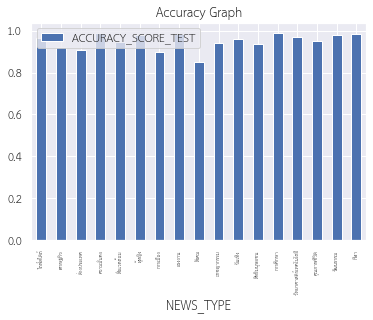

Accuracy Score Train:  37.71968980518252
Accuracy Score Test:  36.55974720638339
END


,NEWS_TYPE,ACCURACY_SCORE_TRAIN,ACCURACY_SCORE_TEST,CONFUSION_REPORT
0,ไลฟ์สไตล์,0.965932,0.963017,"{'0': {'precision': 0.9631415654640546, 'recal..."
1,เศรษฐกิจ,0.924645,0.922856,"{'0': {'precision': 0.9234162568701186, 'recal..."
2,ต่างประเทศ,0.911337,0.909174,"{'0': {'precision': 0.9084159314526377, 'recal..."
3,ความมั่นคง,0.988720,0.988455,"{'0': {'precision': 0.9884895134524398, 'recal..."
4,สิ่งแวดล้อม,0.943401,0.944251,"{'0': {'precision': 0.9444454258006395, 'recal..."
5,ผู้หญิง,0.980208,0.977828,"{'0': {'precision': 0.9779437733983188, 'recal..."
6,การเมือง,0.900488,0.899200,"{'0': {'precision': 0.9078489090623104, 'recal..."
7,แรงงาน,0.986079,0.985648,"{'0': {'precision': 0.9856648541769649, 'recal..."
8,สังคม,0.853633,0.849401,"{'0': {'precision': 0.8497100544205549, 'recal..."
9,อาชญากรรม,0.939777,0.939026,"{'0': {'precision': 0.9392258111770306, 'recal..."


In [ ]:
## start model
print('Start')
dfx = model_set( 'NB' ,x_train,y_train,x_test,y_test) 
print('END')
dfx.head(100)

In [ ]:
dfx.to_csv('/content/drive/MyDrive/deep_final/Accuracy_report_NB.csv',encoding='UTF-8-sig')

In [ ]:
# #y_test.columns.values#.str.contains('predict')
# y_test_new = [ i  for i in  y_test.columns if 'predict' in i ]
# y_test_new
# yest_predict = y_test.loc[ : , y_test.columns.str.contains('predict') ].reset_index().drop(columns=['index'],errors='ignore').sort_index()
# yest_actual= y_test.loc[:,~y_test.columns.str.contains('predict')].reset_index().drop(columns=['index'],errors='ignore').sort_index()
# #actual = list(yest_actual.loc[1 ,  yest_actual.columns.str.contains('predict') ] ).sort_index())
# #yest_predict = yest_predict.reset_index().drop(columns ='index')
# print(yest_actual.columns)
# print(yest_predict.columns)
# #actual
# print(list(y_test.loc[0, yest_predict.columns]))
#  #,y_test.loc[0, yest_actual.columns])
# print(list(y_test.loc[0, yest_actual.columns]))

Index(['ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ', 'ความมั่นคง', 'สิ่งแวดล้อม',
       'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม', 'อาชญากรรม', 'บันเทิง',
       'สิทธิมนุษยชน', 'การศึกษา', 'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต',
       'วัฒนธรรม', 'กีฬา'],
      dtype='object')
Index(['predict_ไลฟ์สไตล์', 'predict_เศรษฐกิจ', 'predict_ต่างประเทศ',
       'predict_ความมั่นคง', 'predict_สิ่งแวดล้อม', 'predict_ผู้หญิง',
       'predict_การเมือง', 'predict_แรงงาน', 'predict_สังคม',
       'predict_อาชญากรรม', 'predict_บันเทิง', 'predict_สิทธิมนุษยชน',
       'predict_การศึกษา', 'predict_วิทยาศาสตร์เทคโนโลยี',
       'predict_คุณภาพชีวิต', 'predict_วัฒนธรรม', 'predict_กีฬา'],
      dtype='object')
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]


## TEST _Result 

In [ ]:
## load data
df_result = pd.read_csv('/content/drive/MyDrive/deep_final/data_for_result3.csv')
df_show =pd.read_csv('/content/drive/MyDrive/deep_final/data_for_showcase.csv')
df_show.head()

,title,body,url,body_cln,Text_Tkn
0,วิษณุ ยันโรดแม็ปเดิม ตอบไม่ถูกเวลาเลือกตั้ง ต...,เมื่อวันที่ 6 ม.ค.60 ที่ทำเนียบรัฐบาล นายวิษณุ...,https://www.thairath.co.th/content/829502,เมื่อวันที่ ม ค ที่ทำเนียบรัฐบาล นายวิษณุ เครื...,เมื่อ วันที่ ม ค ที่ ทำเนียบรัฐบาล นาย วิษณุ เ...
1,แชมป์โลก 2018,พ่ายสวีเดนด้วยประตูรวม 0–1 ตกรอบเพลย์ออฟไปอย่...,https://www.thairath.co.th/sport/eurofootball/...,พ่ายสวีเดนด้วยประตูรวม ตกรอบเพลย์ออฟไปอย่างน...,พ่าย สวีเดน ด้วย ประตู รวม ตกรอบ เพลย์ ออฟ ไป ...
2,ลุยเจาะไข่แดงตลาดใหม่ พาณิชย์ การันตีปนี้ส่งออ...,"ด้านฮาลาล ธนาคารพาณิชย์ร่วมมือกันดันส่งออก,นาง...",https://www.thairath.co.th/content/594241,ด้านฮาลาล ธนาคารพาณิชย์ร่วมมือกันดันส่งออกนางอ...,ด้าน ฮาลาล ธนาคารพาณิชย์ ร่วมมือ กัน ดัน ส่งออ...
3,เกร็ดข่าวลูกหนัง 16/05/58,เซบีญา ยังคงโชว์ฟอร์มยอดเยี่ยมสมราคาแชมป์เก่า ...,https://www.thairath.co.th/content/499085,เซบีญา ยังคงโชว์ฟอร์มยอดเยี่ยมสมราคาแชมป์เก่า ...,เซ บี ญา ยังคง โชว์ ฟอร์ม ยอดเยี่ยม สมราคา แชม...
4,MERCEDES BENZ เปิดตัว MAYBACH S500 2015 รถหรู...,6 สิงหาคม 2558 Mercedes Benz ตอกย้ำภาพลักษณ์คว...,https://www.thairath.co.th/content/516621,สิงหาคม Mercedes Benz ตอกย้ำภาพลักษณ์ความเป็น...,สิงหาคม Mercedes Benz ตอกย้ำ ภาพลักษณ์ ความเป็...


In [ ]:
#df_show.columns\
df_result.head()

,type,body_cln,Text_Tkn,ต่างประเทศ,เศรษฐกิจ,วัฒนธรรม,การศึกษา,ความมั่นคง,คุณภาพชีวิต,อาชญากรรม,สิทธิมนุษยชน,สิ่งแวดล้อม,กีฬา,สังคม,บันเทิง,การเมือง,filter
0,"สิทธิมนุษยชน,ไอซีที",โดยล่าสุดถูกปั่นว่าเรียกร้องให้สังคมให้อภัยเป...,โดย ล่าสุด ถูก ปั่น ว่า เรียกร้อง ให้ สังคม ให...,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,"กีฬา,ฟุตบอลยุโรป",สำนักข่าวต่างประเทศรายงานวันที่ ก ย ว่า หลังจา...,สำนัก ข่าวต่างประเทศ รายงาน วันที่ ก ย ว่า หลั...,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,"ข่าว,อาชญากรรม",ชาวบ้านหมู่ ต บ้านกลาง อ อ่าวลึก จ กระบี่ ออกม...,ชาวบ้าน หมู่ ต บ้าน กลาง อ อ่าว ลึก จ กระบี่ อ...,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,"การเมือง,สังคม",ชี้ถ้าไม่ยกเลิกองค์ประกอบอย่างมาตรา ไทยก็ไม่ม...,ชี้ ถ้า ไม่ ยกเลิก องค์ประกอบ อย่าง มาตรา ไทย ...,0,0,0,0,0,0,0,0,0,0,1,0,1,2
4,เศรษฐกิจ,นายนิพนธ์ วงษ์ตระหง่าน อดีตผู้อำนวยการองค์การค...,นาย นิพนธ์ วงษ์ ตระหง่าน อดีต ผู้อำนวยการ องค์...,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
import pickle
import glob  
# # Save the Modle to file in the current working directory

for i in glob.glob('/content/drive/MyDrive/deep_final/ovsr_NB/*') :
    rr = i.split('/')[-1].split('_')[1]
    with open(i, 'rb') as file:  
      Pickled_LR_Model = pickle.load(file)
      #print(Pickled_LR_Model)
    df_test_prep[f'predict_{rr}'] = Pickled_LR_Model.predict(df_test_prep['Tkn_Text'])
    #df_test_prep[f'predict_{rr}'] = Pickled_LR_Model.predict(df_test_prep['Tkn_Text'])



In [ ]:
# = df_test_prep.drop(columns='predict_ไลฟ์สไตล์')
df_test_prep.head()

,ไลฟ์สไตล์,เศรษฐกิจ,ต่างประเทศ,ความมั่นคง,สิ่งแวดล้อม,ผู้หญิง,การเมือง,แรงงาน,สังคม,อาชญากรรม,บันเทิง,สิทธิมนุษยชน,การศึกษา,วิทยาศาสตร์เทคโนโลยี,คุณภาพชีวิต,วัฒนธรรม,กีฬา,Tkn_Text,predict_ไลฟ์สไตล์,predict_เศรษฐกิจ,predict_ต่างประเทศ,predict_ความมั่นคง,predict_สิ่งแวดล้อม,predict_ผู้หญิง,predict_การเมือง,predict_แรงงาน,predict_สังคม,predict_อาชญากรรม,predict_บันเทิง,predict_สิทธิมนุษยชน,predict_การศึกษา,predict_วิทยาศาสตร์เทคโนโลยี,predict_คุณภาพชีวิต,predict_วัฒนธรรม,predict_กีฬา
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,วันนี้ ก พ นาย บุ ณย พงศ์ โพธิ วัฒน ์ธนัต ผู้อ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ที่ประชุม คณะกรรมการ กิจการ โทร คม นาค มก ทค ม...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,ลูก อยู่ ไม่ นิ่ง เดี๋ยว ปีน โซฟา บ้าง ปีน เก้...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,วันที่ พ ค นาย มานพ มานะ สกุล กิจ นายก สมาคม ศ...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,แมลงสาบ ขึ้นชื่อว่า เป็น สัตว์ อึด ที่สุด ใน โ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test_prep.to_csv('/content/drive/MyDrive/deep_final/test_result_NB.csv',encoding='UTF-8-sig')

In [ ]:
df_result.to_csv('/content/drive/MyDrive/deep_final/result_result_predict_NB.csv',encoding='UTF-8-sig')

In [ ]:
df_show.to_csv('/content/drive/MyDrive/deep_final/showcase_result_predict_NB.csv',encoding='UTF-8-sig')